Objective is to get the cart to the flag. Initially, we just move randomly

In [1]:
import gym
import numpy as np

env = gym.make("MountainCar-v0")

LEARNING_RATE = 0.1

DISCOUNT = 0.95
EPISODES = 4000
SHOW_EVERY = 1000
STATS_EVERY = 100

DISCRETE_OS_SIZE = [20] * len(env.observation_space.high)
discrete_os_win_size = (env.observation_space.high - env.observation_space.low)/DISCRETE_OS_SIZE

# For Stats
ep_rewards = []
aggr_ep_rewards = {'ep': [], 'avg': [], 'max': [], 'min': []}

# Exploration settings
epsilon = 1  # not a constant, qoing to be decayed
START_EPSILON_DECAYING = 1
END_EPSILON_DECAYING = EPISODES//2
epsilon_decay_value = epsilon/(END_EPSILON_DECAYING - START_EPSILON_DECAYING)


q_table = np.random.uniform(low=-2, high=0, size=(DISCRETE_OS_SIZE + [env.action_space.n]))


def get_discrete_state(state):
    discrete_state = (state - env.observation_space.low)/discrete_os_win_size
    return tuple(discrete_state.astype(np.int))  # we use this tuple to look up the 3 Q values for the available actions in the q-table


for episode in range(EPISODES):
    episode_reward = 0
    discrete_state = get_discrete_state(env.reset())
    done = False

    if episode % SHOW_EVERY == 0:
        render = True
        print(episode)
    else:
        render = False

    while not done:

        if np.random.random() > epsilon:
            # Get action from Q table
            action = np.argmax(q_table[discrete_state])
        else:
            # Get random action
            action = np.random.randint(0, env.action_space.n)


        new_state, reward, done, _ = env.step(action)
        episode_reward += reward

        new_discrete_state = get_discrete_state(new_state)

        if episode % SHOW_EVERY == 0:
            env.render()
        #new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)

        # If simulation did not end yet after last step - update Q table
        if not done:

            # Maximum possible Q value in next step (for new state)
            max_future_q = np.max(q_table[new_discrete_state])

            # Current Q value (for current state and performed action)
            current_q = q_table[discrete_state + (action,)]

            # And here's our equation for a new Q value for current state and action
            new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)

            # Update Q table with new Q value
            q_table[discrete_state + (action,)] = new_q


        # Simulation ended (for any reson) - if goal position is achived - update Q value with reward directly
        elif new_state[0] >= env.goal_position:
            #q_table[discrete_state + (action,)] = reward
            print(f"made it in episode:{episode}")
            q_table[discrete_state + (action,)] = 0

        discrete_state = new_discrete_state

    # Decaying is being done every episode if episode number is within decaying range
    if END_EPSILON_DECAYING >= episode >= START_EPSILON_DECAYING:
        epsilon -= epsilon_decay_value
    
    ep_rewards.append(episode_reward)
    if not episode % STATS_EVERY:
        average_reward = sum(ep_rewards[-STATS_EVERY:])/STATS_EVERY
        aggr_ep_rewards['ep'].append(episode)
        aggr_ep_rewards['avg'].append(average_reward)
        aggr_ep_rewards['max'].append(max(ep_rewards[-STATS_EVERY:]))
        aggr_ep_rewards['min'].append(min(ep_rewards[-STATS_EVERY:]))
        print(f'Episode: {episode:>5d}, average reward: {average_reward:>4.1f}, current epsilon: {epsilon:>1.2f}')
        
env.close()

0
Episode:     0, average reward: -2.0, current epsilon: 1.00
Episode:   100, average reward: -200.0, current epsilon: 0.95
Episode:   200, average reward: -200.0, current epsilon: 0.90
Episode:   300, average reward: -200.0, current epsilon: 0.85
Episode:   400, average reward: -200.0, current epsilon: 0.80
Episode:   500, average reward: -200.0, current epsilon: 0.75
Episode:   600, average reward: -200.0, current epsilon: 0.70
Episode:   700, average reward: -200.0, current epsilon: 0.65
Episode:   800, average reward: -200.0, current epsilon: 0.60
Episode:   900, average reward: -200.0, current epsilon: 0.55
1000
Episode:  1000, average reward: -200.0, current epsilon: 0.50
Episode:  1100, average reward: -200.0, current epsilon: 0.45
Episode:  1200, average reward: -200.0, current epsilon: 0.40
made it in episode:1224
Episode:  1300, average reward: -199.8, current epsilon: 0.35
made it in episode:1370
made it in episode:1379
Episode:  1400, average reward: -199.9, current epsilon

made it in episode:2430
made it in episode:2431
made it in episode:2432
made it in episode:2433
made it in episode:2434
made it in episode:2435
made it in episode:2436
made it in episode:2437
made it in episode:2438
made it in episode:2439
made it in episode:2440
made it in episode:2441
made it in episode:2442
made it in episode:2443
made it in episode:2444
made it in episode:2445
made it in episode:2446
made it in episode:2447
made it in episode:2448
made it in episode:2450
made it in episode:2451
made it in episode:2464
Episode:  2500, average reward: -188.6, current epsilon: -0.00
made it in episode:2526
made it in episode:2529
made it in episode:2531
made it in episode:2532
made it in episode:2546
made it in episode:2549
made it in episode:2553
made it in episode:2554
made it in episode:2555
made it in episode:2556
made it in episode:2557
made it in episode:2559
made it in episode:2561
made it in episode:2562
made it in episode:2563
made it in episode:2564
made it in episode:2565
m

made it in episode:2970
made it in episode:2971
made it in episode:2972
made it in episode:2973
made it in episode:2974
made it in episode:2975
made it in episode:2978
made it in episode:2979
made it in episode:2980
made it in episode:2981
made it in episode:2982
made it in episode:2983
made it in episode:2984
made it in episode:2986
made it in episode:2988
made it in episode:2989
made it in episode:2990
made it in episode:2991
made it in episode:2994
made it in episode:2995
made it in episode:2996
made it in episode:2997
made it in episode:2998
made it in episode:2999
3000
made it in episode:3000
Episode:  3000, average reward: -176.0, current epsilon: -0.00
made it in episode:3001
made it in episode:3002
made it in episode:3004
made it in episode:3005
made it in episode:3006
made it in episode:3007
made it in episode:3008
made it in episode:3009
made it in episode:3011
made it in episode:3012
made it in episode:3013
made it in episode:3014
made it in episode:3015
made it in episode:3

made it in episode:3405
made it in episode:3410
made it in episode:3411
made it in episode:3413
made it in episode:3416
made it in episode:3419
made it in episode:3423
made it in episode:3424
made it in episode:3425
made it in episode:3426
made it in episode:3427
made it in episode:3428
made it in episode:3429
made it in episode:3430
made it in episode:3431
made it in episode:3432
made it in episode:3433
made it in episode:3434
made it in episode:3435
made it in episode:3436
made it in episode:3437
made it in episode:3438
made it in episode:3439
made it in episode:3440
made it in episode:3441
made it in episode:3442
made it in episode:3443
made it in episode:3444
made it in episode:3445
made it in episode:3446
made it in episode:3447
made it in episode:3448
made it in episode:3449
made it in episode:3450
made it in episode:3451
made it in episode:3452
made it in episode:3453
made it in episode:3454
made it in episode:3455
made it in episode:3456
made it in episode:3457
made it in episo

made it in episode:3767
made it in episode:3768
made it in episode:3769
made it in episode:3770
made it in episode:3771
made it in episode:3772
made it in episode:3773
made it in episode:3774
made it in episode:3775
made it in episode:3776
made it in episode:3777
made it in episode:3778
made it in episode:3779
made it in episode:3780
made it in episode:3781
made it in episode:3782
made it in episode:3783
made it in episode:3784
made it in episode:3785
made it in episode:3786
made it in episode:3787
made it in episode:3788
made it in episode:3789
made it in episode:3790
made it in episode:3791
made it in episode:3792
made it in episode:3793
made it in episode:3794
made it in episode:3795
made it in episode:3796
made it in episode:3797
made it in episode:3798
made it in episode:3799
made it in episode:3800
Episode:  3800, average reward: -155.2, current epsilon: -0.00
made it in episode:3801
made it in episode:3802
made it in episode:3805
made it in episode:3810
made it in episode:3811
m

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

Lets visualize the Episode rewards as we tracked them above

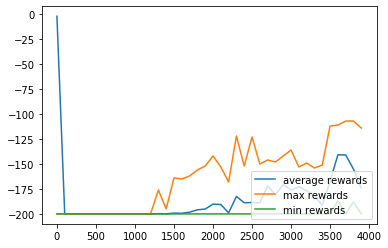

In [5]:
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['avg'], label="average rewards")
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['max'], label="max rewards")
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['min'], label="min rewards")
plt.legend(loc=4)
plt.show()

Then, we can tweak certain to things to see if it helps or hurts us. For example, we could try to change our Epsilon decay policy. Let's set that to decay to the very end: END_EPSILON_DECAYING = EPISODES

Running the algorithm again:

In [7]:
LEARNING_RATE = 0.1

DISCOUNT = 0.95
EPISODES = 4000
SHOW_EVERY = 1000
STATS_EVERY = 100

DISCRETE_OS_SIZE = [20] * len(env.observation_space.high)
discrete_os_win_size = (env.observation_space.high - env.observation_space.low)/DISCRETE_OS_SIZE

# For Stats
ep_rewards = []
aggr_ep_rewards = {'ep': [], 'avg': [], 'max': [], 'min': []}

# Exploration settings
epsilon = 1  # not a constant, qoing to be decayed
START_EPSILON_DECAYING = 1
END_EPSILON_DECAYING = EPISODES
epsilon_decay_value = epsilon/(END_EPSILON_DECAYING - START_EPSILON_DECAYING)


q_table = np.random.uniform(low=-2, high=0, size=(DISCRETE_OS_SIZE + [env.action_space.n]))


def get_discrete_state(state):
    discrete_state = (state - env.observation_space.low)/discrete_os_win_size
    return tuple(discrete_state.astype(np.int))  # we use this tuple to look up the 3 Q values for the available actions in the q-table


for episode in range(EPISODES):
    episode_reward = 0
    discrete_state = get_discrete_state(env.reset())
    done = False

    if episode % SHOW_EVERY == 0:
        render = True
        print(episode)
    else:
        render = False

    while not done:

        if np.random.random() > epsilon:
            # Get action from Q table
            action = np.argmax(q_table[discrete_state])
        else:
            # Get random action
            action = np.random.randint(0, env.action_space.n)


        new_state, reward, done, _ = env.step(action)
        episode_reward += reward

        new_discrete_state = get_discrete_state(new_state)

        if episode % SHOW_EVERY == 0:
            env.render()
        #new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)

        # If simulation did not end yet after last step - update Q table
        if not done:

            # Maximum possible Q value in next step (for new state)
            max_future_q = np.max(q_table[new_discrete_state])

            # Current Q value (for current state and performed action)
            current_q = q_table[discrete_state + (action,)]

            # And here's our equation for a new Q value for current state and action
            new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)

            # Update Q table with new Q value
            q_table[discrete_state + (action,)] = new_q


        # Simulation ended (for any reson) - if goal position is achived - update Q value with reward directly
        elif new_state[0] >= env.goal_position:
            #q_table[discrete_state + (action,)] = reward
            print(f"made it in episode:{episode}")
            q_table[discrete_state + (action,)] = 0

        discrete_state = new_discrete_state

    # Decaying is being done every episode if episode number is within decaying range
    if END_EPSILON_DECAYING >= episode >= START_EPSILON_DECAYING:
        epsilon -= epsilon_decay_value
    
    ep_rewards.append(episode_reward)
    if not episode % STATS_EVERY:
        average_reward = sum(ep_rewards[-STATS_EVERY:])/STATS_EVERY
        aggr_ep_rewards['ep'].append(episode)
        aggr_ep_rewards['avg'].append(average_reward)
        aggr_ep_rewards['max'].append(max(ep_rewards[-STATS_EVERY:]))
        aggr_ep_rewards['min'].append(min(ep_rewards[-STATS_EVERY:]))
        print(f'Episode: {episode:>5d}, average reward: {average_reward:>4.1f}, current epsilon: {epsilon:>1.2f}')
        
env.close()

0
Episode:     0, average reward: -2.0, current epsilon: 1.00
Episode:   100, average reward: -200.0, current epsilon: 0.97
Episode:   200, average reward: -200.0, current epsilon: 0.95
Episode:   300, average reward: -200.0, current epsilon: 0.92
Episode:   400, average reward: -200.0, current epsilon: 0.90
Episode:   500, average reward: -200.0, current epsilon: 0.87
Episode:   600, average reward: -200.0, current epsilon: 0.85
Episode:   700, average reward: -200.0, current epsilon: 0.82
Episode:   800, average reward: -200.0, current epsilon: 0.80
Episode:   900, average reward: -200.0, current epsilon: 0.77
1000
Episode:  1000, average reward: -200.0, current epsilon: 0.75
Episode:  1100, average reward: -200.0, current epsilon: 0.72
Episode:  1200, average reward: -200.0, current epsilon: 0.70
Episode:  1300, average reward: -200.0, current epsilon: 0.67
Episode:  1400, average reward: -200.0, current epsilon: 0.65
Episode:  1500, average reward: -200.0, current epsilon: 0.62
Epi

made it in episode:3851
made it in episode:3852
made it in episode:3853
made it in episode:3854
made it in episode:3855
made it in episode:3856
made it in episode:3857
made it in episode:3858
made it in episode:3859
made it in episode:3860
made it in episode:3861
made it in episode:3862
made it in episode:3863
made it in episode:3864
made it in episode:3865
made it in episode:3866
made it in episode:3867
made it in episode:3868
made it in episode:3869
made it in episode:3870
made it in episode:3871
made it in episode:3872
made it in episode:3873
made it in episode:3874
made it in episode:3875
made it in episode:3876
made it in episode:3877
made it in episode:3878
made it in episode:3879
made it in episode:3880
made it in episode:3881
made it in episode:3882
made it in episode:3883
made it in episode:3884
made it in episode:3885
made it in episode:3886
made it in episode:3887
made it in episode:3888
made it in episode:3889
made it in episode:3890
made it in episode:3891
made it in episo

Lets visualize the results with END_EPSILON_DECAYING = EPISODES with grids

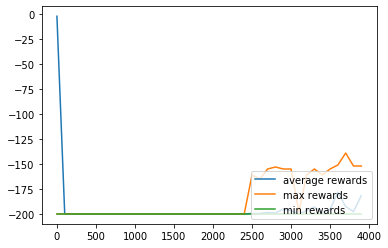

In [8]:
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['avg'], label="average rewards")
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['max'], label="max rewards")
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['min'], label="min rewards")
plt.legend(loc=4)
plt.show()

Now, increasing the no. of episodes to 10,000 and visualize with plt.grid(True) 

# Increasing Episodes to 10,000

0
Episode:     0, average reward: -2.0, current epsilon: 1.00
Episode:   100, average reward: -200.0, current epsilon: 0.99
Episode:   200, average reward: -200.0, current epsilon: 0.98
Episode:   300, average reward: -200.0, current epsilon: 0.97
Episode:   400, average reward: -200.0, current epsilon: 0.96
Episode:   500, average reward: -200.0, current epsilon: 0.95
Episode:   600, average reward: -200.0, current epsilon: 0.94
Episode:   700, average reward: -200.0, current epsilon: 0.93
Episode:   800, average reward: -200.0, current epsilon: 0.92
Episode:   900, average reward: -200.0, current epsilon: 0.91
1000
Episode:  1000, average reward: -200.0, current epsilon: 0.90
Episode:  1100, average reward: -200.0, current epsilon: 0.89
Episode:  1200, average reward: -200.0, current epsilon: 0.88
Episode:  1300, average reward: -200.0, current epsilon: 0.87
Episode:  1400, average reward: -200.0, current epsilon: 0.86
Episode:  1500, average reward: -200.0, current epsilon: 0.85
Epi

made it in episode:6974
made it in episode:6982
7000
Episode:  7000, average reward: -195.9, current epsilon: 0.30
made it in episode:7056
made it in episode:7080
made it in episode:7086
made it in episode:7092
made it in episode:7099
Episode:  7100, average reward: -199.3, current epsilon: 0.29
made it in episode:7101
made it in episode:7107
made it in episode:7109
made it in episode:7111
made it in episode:7115
made it in episode:7118
made it in episode:7119
made it in episode:7121
made it in episode:7122
made it in episode:7123
made it in episode:7124
made it in episode:7125
made it in episode:7126
made it in episode:7127
made it in episode:7129
made it in episode:7130
made it in episode:7131
made it in episode:7132
made it in episode:7133
made it in episode:7135
made it in episode:7136
made it in episode:7139
made it in episode:7141
made it in episode:7145
made it in episode:7146
made it in episode:7151
made it in episode:7154
made it in episode:7157
made it in episode:7158
made it

made it in episode:7806
made it in episode:7809
made it in episode:7890
made it in episode:7893
made it in episode:7897
made it in episode:7898
Episode:  7900, average reward: -198.6, current epsilon: 0.21
made it in episode:7902
made it in episode:7907
made it in episode:7908
made it in episode:7911
made it in episode:7918
made it in episode:7922
made it in episode:7924
made it in episode:7926
made it in episode:7927
made it in episode:7930
made it in episode:7931
made it in episode:7940
made it in episode:7943
made it in episode:7944
made it in episode:7946
made it in episode:7948
made it in episode:7950
made it in episode:7951
made it in episode:7952
made it in episode:7954
made it in episode:7955
made it in episode:7961
made it in episode:7963
made it in episode:7965
made it in episode:7966
made it in episode:7968
made it in episode:7970
made it in episode:7972
made it in episode:7973
made it in episode:7976
made it in episode:7978
made it in episode:7982
made it in episode:7983
ma

made it in episode:8596
made it in episode:8597
made it in episode:8598
made it in episode:8599
Episode:  8600, average reward: -175.7, current epsilon: 0.14
made it in episode:8601
made it in episode:8603
made it in episode:8604
made it in episode:8605
made it in episode:8606
made it in episode:8607
made it in episode:8608
made it in episode:8613
made it in episode:8614
made it in episode:8617
made it in episode:8618
made it in episode:8619
made it in episode:8621
made it in episode:8623
made it in episode:8624
made it in episode:8625
made it in episode:8626
made it in episode:8627
made it in episode:8628
made it in episode:8629
made it in episode:8630
made it in episode:8631
made it in episode:8632
made it in episode:8633
made it in episode:8634
made it in episode:8635
made it in episode:8636
made it in episode:8638
made it in episode:8639
made it in episode:8640
made it in episode:8641
made it in episode:8642
made it in episode:8643
made it in episode:8644
made it in episode:8645
ma

made it in episode:9073
made it in episode:9074
made it in episode:9075
made it in episode:9076
made it in episode:9077
made it in episode:9078
made it in episode:9079
made it in episode:9081
made it in episode:9082
made it in episode:9086
made it in episode:9087
made it in episode:9088
made it in episode:9090
made it in episode:9091
made it in episode:9092
made it in episode:9093
made it in episode:9094
made it in episode:9095
made it in episode:9098
made it in episode:9099
made it in episode:9100
Episode:  9100, average reward: -172.3, current epsilon: 0.09
made it in episode:9101
made it in episode:9104
made it in episode:9105
made it in episode:9106
made it in episode:9107
made it in episode:9108
made it in episode:9109
made it in episode:9110
made it in episode:9111
made it in episode:9112
made it in episode:9113
made it in episode:9114
made it in episode:9115
made it in episode:9117
made it in episode:9118
made it in episode:9119
made it in episode:9120
made it in episode:9121
ma

made it in episode:9489
made it in episode:9490
made it in episode:9491
made it in episode:9492
made it in episode:9493
made it in episode:9494
made it in episode:9495
made it in episode:9496
made it in episode:9497
made it in episode:9498
made it in episode:9499
made it in episode:9500
Episode:  9500, average reward: -162.4, current epsilon: 0.05
made it in episode:9501
made it in episode:9502
made it in episode:9503
made it in episode:9504
made it in episode:9505
made it in episode:9506
made it in episode:9507
made it in episode:9508
made it in episode:9509
made it in episode:9510
made it in episode:9511
made it in episode:9512
made it in episode:9513
made it in episode:9514
made it in episode:9515
made it in episode:9516
made it in episode:9517
made it in episode:9518
made it in episode:9519
made it in episode:9520
made it in episode:9521
made it in episode:9522
made it in episode:9523
made it in episode:9524
made it in episode:9525
made it in episode:9526
made it in episode:9527
ma

made it in episode:9869
made it in episode:9870
made it in episode:9871
made it in episode:9872
made it in episode:9873
made it in episode:9874
made it in episode:9875
made it in episode:9876
made it in episode:9877
made it in episode:9878
made it in episode:9879
made it in episode:9880
made it in episode:9884
made it in episode:9885
made it in episode:9886
made it in episode:9888
made it in episode:9889
made it in episode:9890
made it in episode:9891
made it in episode:9893
made it in episode:9894
made it in episode:9895
made it in episode:9897
made it in episode:9898
made it in episode:9899
made it in episode:9900
Episode:  9900, average reward: -161.5, current epsilon: 0.01
made it in episode:9901
made it in episode:9902
made it in episode:9903
made it in episode:9904
made it in episode:9905
made it in episode:9906
made it in episode:9908
made it in episode:9909
made it in episode:9910
made it in episode:9911
made it in episode:9912
made it in episode:9913
made it in episode:9914
ma

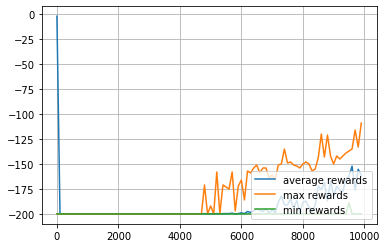

In [9]:
LEARNING_RATE = 0.1
DISCOUNT = 0.95
EPISODES = 10000
SHOW_EVERY = 1000
STATS_EVERY = 100

DISCRETE_OS_SIZE = [20] * len(env.observation_space.high)
discrete_os_win_size = (env.observation_space.high - env.observation_space.low)/DISCRETE_OS_SIZE

# For Stats
ep_rewards = []
aggr_ep_rewards = {'ep': [], 'avg': [], 'max': [], 'min': []}

# Exploration settings
epsilon = 1  # not a constant, qoing to be decayed
START_EPSILON_DECAYING = 1
END_EPSILON_DECAYING = EPISODES
epsilon_decay_value = epsilon/(END_EPSILON_DECAYING - START_EPSILON_DECAYING)


q_table = np.random.uniform(low=-2, high=0, size=(DISCRETE_OS_SIZE + [env.action_space.n]))


def get_discrete_state(state):
    discrete_state = (state - env.observation_space.low)/discrete_os_win_size
    return tuple(discrete_state.astype(np.int))  # we use this tuple to look up the 3 Q values for the available actions in the q-table


for episode in range(EPISODES):
    episode_reward = 0
    discrete_state = get_discrete_state(env.reset())
    done = False

    if episode % SHOW_EVERY == 0:
        render = True
        print(episode)
    else:
        render = False

    while not done:

        if np.random.random() > epsilon:
            # Get action from Q table
            action = np.argmax(q_table[discrete_state])
        else:
            # Get random action
            action = np.random.randint(0, env.action_space.n)


        new_state, reward, done, _ = env.step(action)
        episode_reward += reward

        new_discrete_state = get_discrete_state(new_state)

        if episode % SHOW_EVERY == 0:
            env.render()
        #new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)

        # If simulation did not end yet after last step - update Q table
        if not done:

            # Maximum possible Q value in next step (for new state)
            max_future_q = np.max(q_table[new_discrete_state])

            # Current Q value (for current state and performed action)
            current_q = q_table[discrete_state + (action,)]

            # And here's our equation for a new Q value for current state and action
            new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)

            # Update Q table with new Q value
            q_table[discrete_state + (action,)] = new_q


        # Simulation ended (for any reson) - if goal position is achived - update Q value with reward directly
        elif new_state[0] >= env.goal_position:
            #q_table[discrete_state + (action,)] = reward
            print(f"made it in episode:{episode}")
            q_table[discrete_state + (action,)] = 0

        discrete_state = new_discrete_state

    # Decaying is being done every episode if episode number is within decaying range
    if END_EPSILON_DECAYING >= episode >= START_EPSILON_DECAYING:
        epsilon -= epsilon_decay_value
    
    ep_rewards.append(episode_reward)
    if not episode % STATS_EVERY:
        average_reward = sum(ep_rewards[-STATS_EVERY:])/STATS_EVERY
        aggr_ep_rewards['ep'].append(episode)
        aggr_ep_rewards['avg'].append(average_reward)
        aggr_ep_rewards['max'].append(max(ep_rewards[-STATS_EVERY:]))
        aggr_ep_rewards['min'].append(min(ep_rewards[-STATS_EVERY:]))
        print(f'Episode: {episode:>5d}, average reward: {average_reward:>4.1f}, current epsilon: {epsilon:>1.2f}')
        
env.close()

plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['avg'], label="average rewards")
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['max'], label="max rewards")
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['min'], label="min rewards")
plt.legend(loc=4)
plt.grid(True) 
plt.show()

Move the legend for clarity

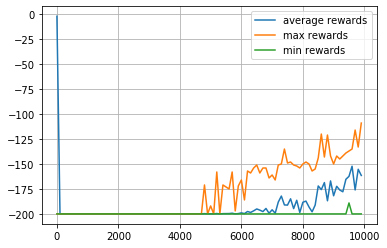

In [11]:
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['avg'], label="average rewards")
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['max'], label="max rewards")
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['min'], label="min rewards")
plt.legend(loc=1)
plt.grid(True) 
plt.show()